In [ ]:
!unzip data

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
import tensorflow.keras.backend as K
from keras.layers import InputLayer


In [21]:

train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)

train_generator = train_datagen.flow_from_directory(
        'data/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=64,
        class_mode='sparse')

validation_generator = train_datagen.flow_from_directory(
        'data/test',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28 batch_size=1,
        class_mode='sparse')

Found 14000 images belonging to 35 classes.
Found 3500 images belonging to 35 classes.


In [22]:
K.clear_session()
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 3)))  # Chỉ rõ input_shape ở đây
model.add(Conv2D(16, (22,22),  activation='relu', padding='same'))
model.add(Conv2D(32, (16,16), activation='relu', padding='same'))
model.add(Conv2D(64, (8,8),  activation='relu', padding='same'))
model.add(Conv2D(64, (4,4), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │        23,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 757,268 (2.89 MB)

 Trainable params: 757,268 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
class stop_training_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Kiểm tra độ chính xác trên tập validation
        if logs.get('val_accuracy', 0) >= 0.99:
            self.model.stop_training = True


In [25]:
batch_size = 64
callbacks = [stop_training_callback()]
history= model.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator,
      epochs = 40, verbose=1, callbacks=callbacks)

Epoch 1/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 105s 473ms/step - accuracy: 0.2263 - loss: 2.7720 - val_accuracy: 0.7620 - val_loss: 0.8012
Epoch 2/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7969 - loss: 0.7456 - val_accuracy: 0.7691 - val_loss: 0.7983
Epoch 3/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 103s 471ms/step - accuracy: 0.7476 - loss: 0.8211 - val_accuracy: 0.8640 - val_loss: 0.4792
Epoch 4/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8125 - loss: 0.7309 - val_accuracy: 0.8583 - val_loss: 0.4657
Epoch 5/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 109s 497ms/step - accuracy: 0.8505 - loss: 0.4924 - val_accuracy: 0.8954 - val_loss: 0.3503
Epoch 6/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8750 - loss: 0.3983 - val_accuracy: 0.9000 - val_loss: 0.3240
Epoch 7/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 107s 490ms/step - accuracy: 0.8831 - loss: 0.3654 - val_accuracy: 0.9177 - val_loss: 0.2628
Epoch 8/40
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9688 - loss: 0.168

In [ ]:
model.save('model.keras')


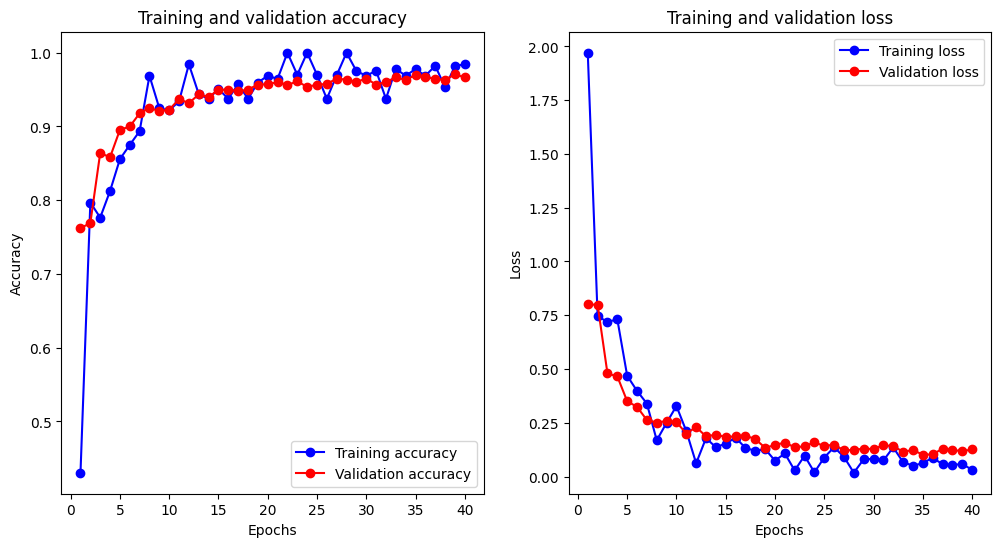

In [27]:
# Vẽ biểu đồ loss và accuracy
def plot_history(history):
    # Lấy các giá trị loss và accuracy từ history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Vẽ biểu đồ accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Vẽ biểu đồ loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Gọi hàm plot_history để vẽ biểu đồ
plot_history(history)